#Exploratory Data Analysis FIFA 2019 & Dream Team

Project Background 
Pada projek ini saya berusaha untuk dapat membuat tim terbaik di setiap posisinya (Dream Team) menggunakan dataset yang disediakan oleh FIFA 2019 (games). Project ini juga mencoba untuk mengeksplorasi data untuk memberikan insight pemain pemain yang ada, mulai dari Pemain Terbaik, Pemain Muda Terbaik, Negara dengan Overall terttingi serta mengetahui hubungan antara variabel usia pemain dengan variabel yang lain untuk digunakan sebagai data pendukung pemain terbaik.

Install library 

In [1]:
%pip install plotly


[notice] A new release of pip is available: 23.0 -> 23.3
[notice] To update, run: python.exe -m pip install --upgrade pip


Import Library

In [135]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import plotly as py
import plotly.graph_objs as go
import seaborn as sns
import os
import warnings

Import Fifa Dataset

In [136]:
df = pd.read_csv("data_fifa.csv")
df.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [137]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 89 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                18207 non-null  int64  
 1   ID                        18207 non-null  int64  
 2   Name                      18207 non-null  object 
 3   Age                       18207 non-null  int64  
 4   Photo                     18207 non-null  object 
 5   Nationality               18207 non-null  object 
 6   Flag                      18207 non-null  object 
 7   Overall                   18207 non-null  int64  
 8   Potential                 18207 non-null  int64  
 9   Club                      17966 non-null  object 
 10  Club Logo                 18207 non-null  object 
 11  Value                     18207 non-null  object 
 12  Wage                      18207 non-null  object 
 13  Special                   18207 non-null  int64  
 14  Prefer

Mengambil fitur penting dari dataset untuk dieksplorasi

In [156]:
#use only important feature
imp_features = ['Name',
                   'Age','Overall', 
                   'Nationality', 
                   'Flag', 'LongPassing',
                    'Club',
                   'BallControl',
                   'Acceleration',
                   'SprintSpeed',
                   'Agility',
                   'Reactions', 
                   'Balance',
                   'ShotPower', 
                   'Jumping',
                   'Stamina', 
                   'Strength',
                   'LongShots',
                   'Aggression',
                   'Interceptions',
                   'Positioning', 
                   'Vision', 
                   'Penalties',
                   'Composure',
                   'Marking',
                   'StandingTackle', 
                   'SlidingTackle',
                   'GKDiving',
                   'GKHandling',
                   'GKKicking',
                   'GKPositioning',
                   'GKReflexes','Position', 'Crossing', 'Volleys', 'HeadingAccuracy', 'ShortPassing', 'FKAccuracy', 'Finishing', 'Curve', 'Dribbling']

dfimp = pd.DataFrame(df, columns=imp_features)

Rerata usia pemain 

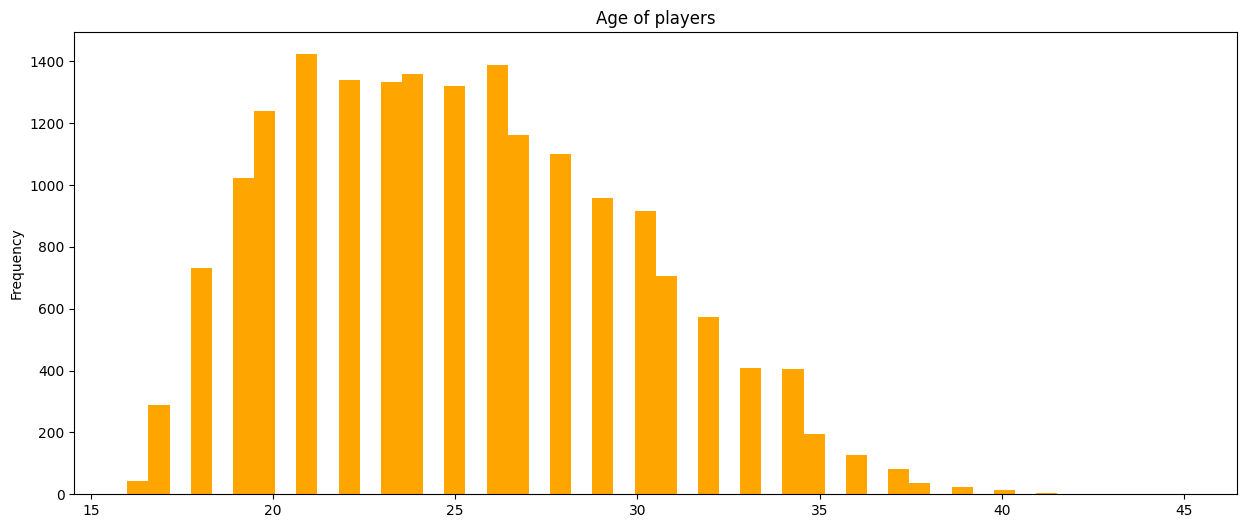

In [139]:
plt.figure(figsize = (15 , 6))
df['Age'].plot(kind = 'hist' , bins = 50, color="orange")
plt.title('Age of players')
plt.show()

Korelasi Usia dengan Fitur lain 
Korelasi ini berguna untuk mengetahui hubungan antara Usia dengan Stamina, trength, Akselerasi, Sprint, Kelincahan, lompatan, Visi bermain, dan reaksi 

Text(0.5, 1.0, 'Usia dibandingkan dengan kecepatan reaksi')

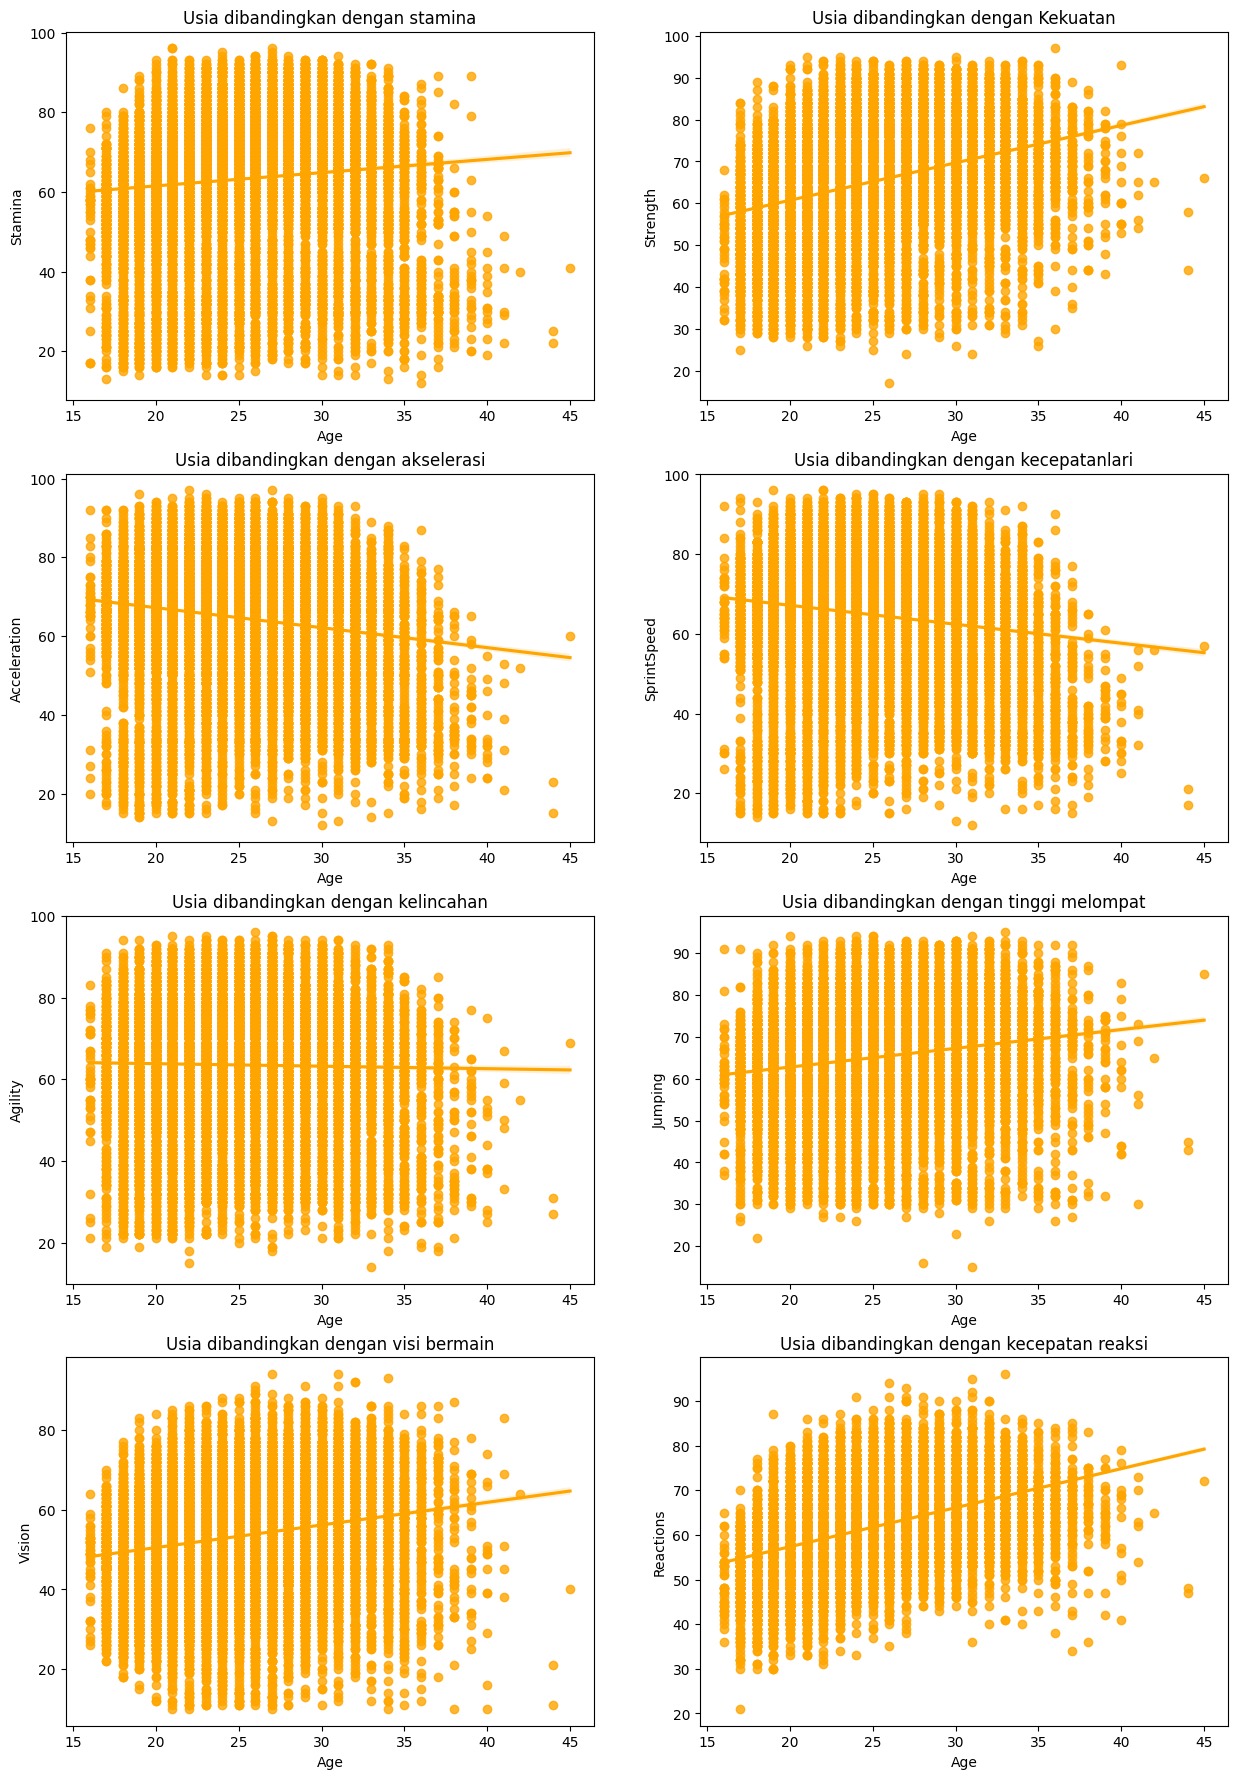

In [140]:
fig = plt.figure(figsize=(15,22))

vals = ['Stamina' , 'Strength' , 'Acceleration','SprintSpeed' , 'Agility' , 'Jumping' ,
       'Vision','Reactions']
"""plt.ylabel("Missing percentage")
plt.xlabel("Feature")"""
plt.subplot(4,2,1)
sns.regplot(x  = 'Age' , y = vals[0] , data = dfimp , color = 'orange')
plt.title("Usia dibandingkan dengan stamina")


plt.subplot(4,2,2)
sns.regplot(x  = 'Age' , y = vals[1] , data = dfimp , color = 'orange')
plt.title("Usia dibandingkan dengan Kekuatan")


plt.subplot(4,2,3)
sns.regplot(x  = 'Age' , y = vals[2]  , data = dfimp , color = 'orange')
plt.title("Usia dibandingkan dengan akselerasi")


plt.subplot(4,2,4)
sns.regplot(x  = 'Age' , y = vals[3] , data = dfimp , color = 'orange')
plt.title("Usia dibandingkan dengan kecepatanlari")


plt.subplot(4,2,5)
sns.regplot(x  = 'Age' , y = vals[4] , data = dfimp , color = 'orange')
plt.title("Usia dibandingkan dengan kelincahan")


plt.subplot(4,2,6)
sns.regplot(x  = 'Age' , y = vals[5] , data = dfimp , color = 'orange')
plt.title("Usia dibandingkan dengan tinggi melompat")


plt.subplot(4,2,7)
sns.regplot(x  = 'Age' , y = vals[6] , data = dfimp , color = 'orange')
plt.title("Usia dibandingkan dengan visi bermain")


plt.subplot(4,2,8)
sns.regplot(x  = 'Age' , y = vals[7] , data = dfimp , color = 'orange')
plt.title("Usia dibandingkan dengan kecepatan reaksi")



Dari visual diatas dapat diketahui bahwa terdapat korelasi positif (miring kanan) dan juga negatif (miring kiri), salah satunya hubungan positif ini adalah antara usia dan stamina, semakin tua usia makin kuat staminanya, untuk korelasi negatif seperti usia dan akselerasi dimana semakin tua usia semakin turun akselerasinya akan tetapi hubungan ini dapat diketahui lemah melalui persebaran plot yang merata. Hubungan tingkat sedang yaitu antara usia dan reaksi, semakin tua usia semakin baik tingkat reaksinya

Hubungan antara usia dan overall

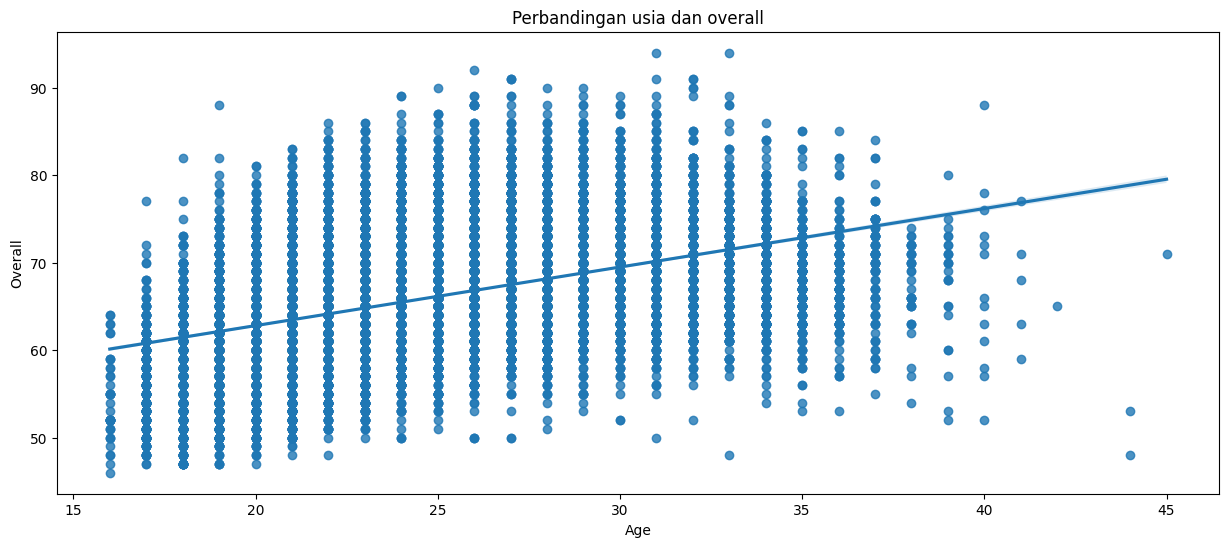

In [141]:
plt.figure(figsize = (15 , 6))
sns.regplot( x= dfimp['Age'] ,y=dfimp['Overall'])
plt.title('Perbandingan usia dan overall')
plt.show()

Korelasi positif didapati antara usia dan juga overall, semakin tua usia maka performa nya semakin bagus, akan tetapi hubungan kedua variabel ini sangat lemah dari persebaran plot yang tidak berkumpul pada garis

Korelasi tiga variabel Stamina Sprint Speed dan Akselerasi

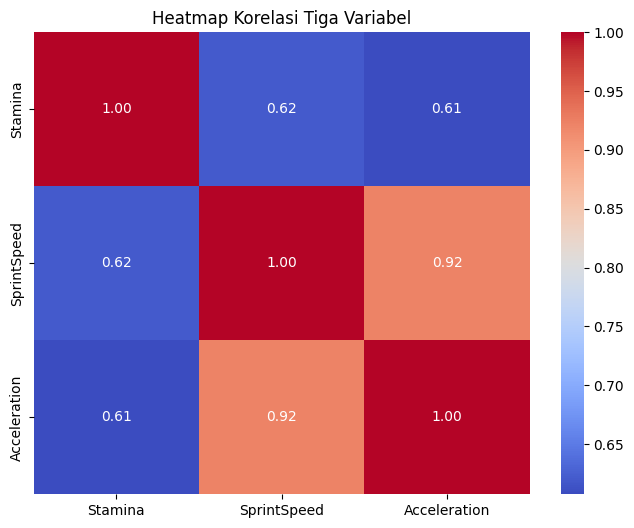

In [142]:
dfcorr = df[["Stamina","SprintSpeed","Acceleration"]]
# Membuat heatmap korelasi
correlation_matrix = dfcorr.corr()

# Mengatur ukuran plot
plt.figure(figsize=(8, 6))

# Membuat heatmap dengan Seaborn
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

# Menampilkan heatmap
plt.title('Heatmap Korelasi Tiga Variabel')
plt.show()

Korelasi kuat ditunjukkan oleh hubungan antara sprint speed dan juga akselerasi sebesar 0.92, jadi semakin cepat akselerasi maka semakin cepat juga sprint dari pemain 

Distribusi data overall

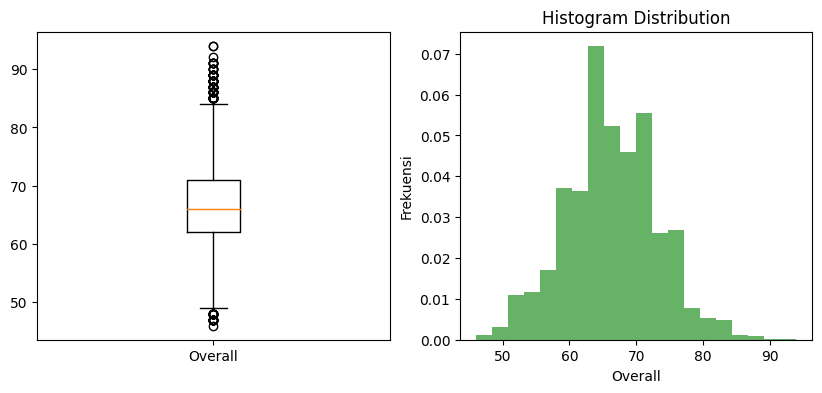

Distribution normal tendency


In [143]:

fig = plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.boxplot(dfimp["Overall"], labels=['Overall'])

plt.subplot(1,2,2)
plt.hist(dfimp["Overall"], bins=20, density=True, alpha=0.6, color='g')
plt.title('Histogram Distribution')
plt.xlabel('Overall')
plt.ylabel('Frekuensi')

plt.show()
print("Distribution normal tendency")

Dari grafik diatas data memiliki kecenderungan berada di tengah tidak ada skeness signifikan sehingga data tersebut dikatakan normal, seperti juga yang ditunjukkan pada boxplot namun data overall, meski dapat diketahui juga data overall ini masih memiliki outlier 

Rata-rata overall pemain berdasarkan posisinya

Position
LF     73.866667
RF     73.250000
RAM    72.285714
LAM    71.857143
LS     70.062802
RDM    69.754032
RS     69.522167
RCB    69.283988
LCM    69.270886
LCB    69.240741
RCM    69.076726
LDM    69.032922
RW     66.929730
CAM    66.903967
LM     66.692237
LW     66.616798
LWB    66.512821
RM     66.496441
CDM    66.313291
RB     66.058869
LB     65.854766
CF     65.824324
ST     65.535781
CB     65.024747
RWB    64.655172
GK     64.603457
CM     63.729555
Name: Overall, dtype: float64


Text(0.5, 1.0, 'Overall by Position')

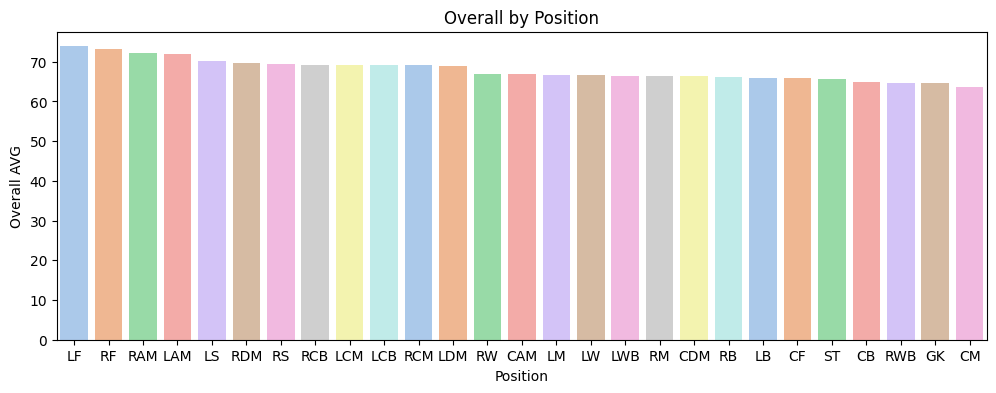

In [144]:
dfoverallbyposition = df[["Overall","Position"]]
dfbar = dfoverallbyposition.groupby('Position')["Overall"].mean().sort_values(ascending=False)
print(dfbar)
plt.figure(figsize=(12,4))
sns.barplot(x= dfbar.index, y=dfbar, palette='pastel')
plt.xlabel('Position')
plt.ylabel('Overall AVG')
plt.title('Overall by Position')

Posisi terbaik berdasarkan keterampilan bermain
data ini digunakan untuk mengetahui posisi terbaik pemain rata-rata dari keterampilan bermain 

Text(0.5, 1.0, 'Stamina by Position')

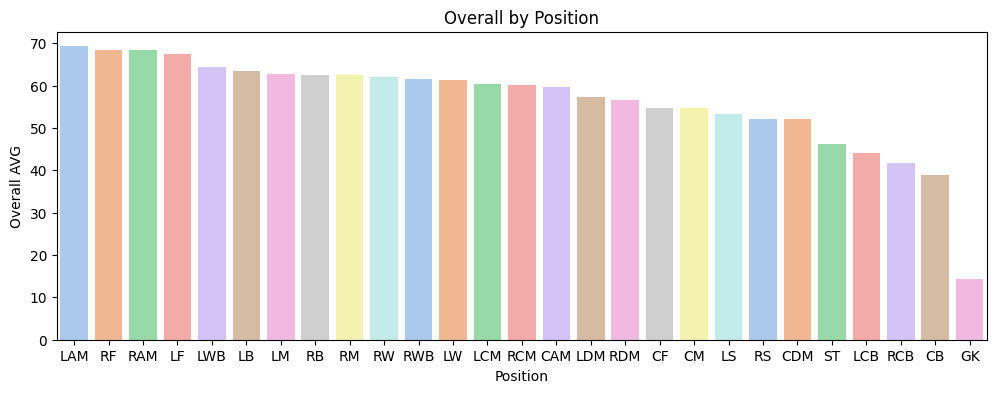

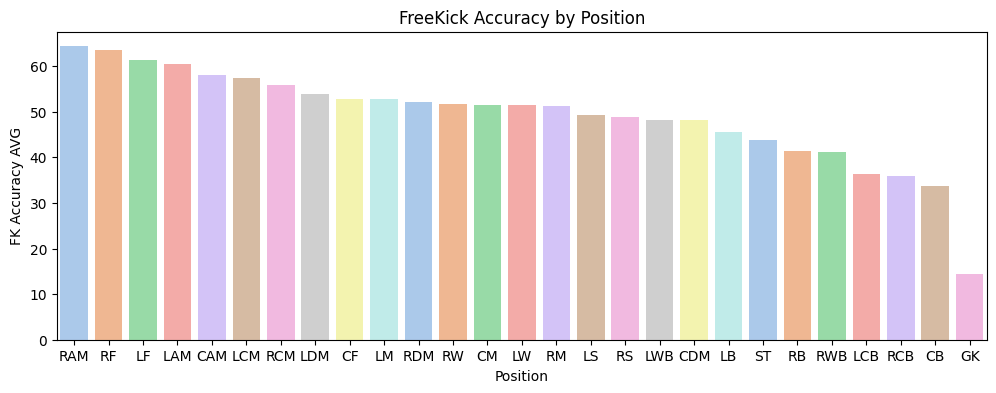

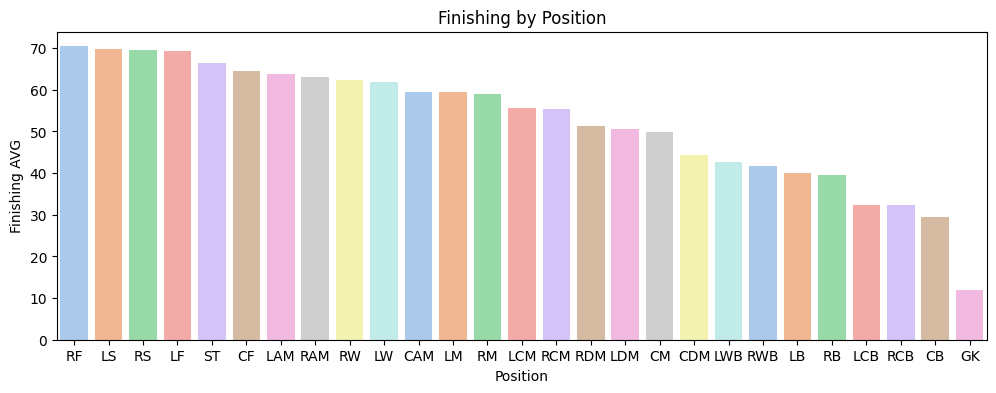

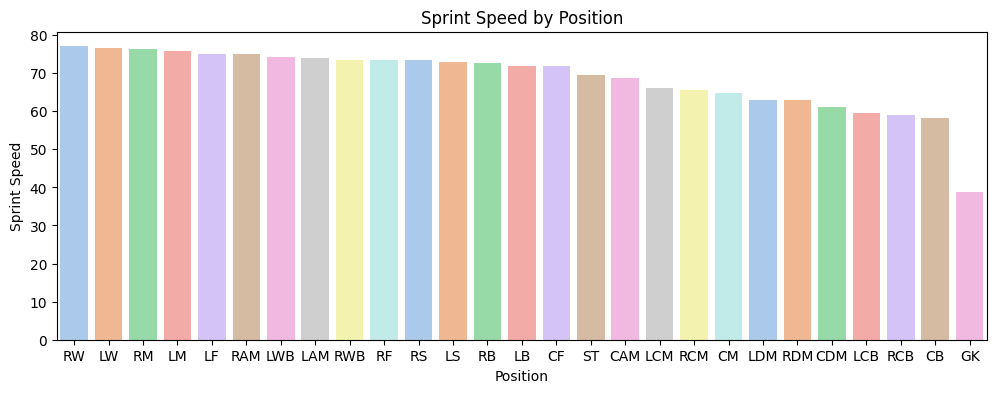

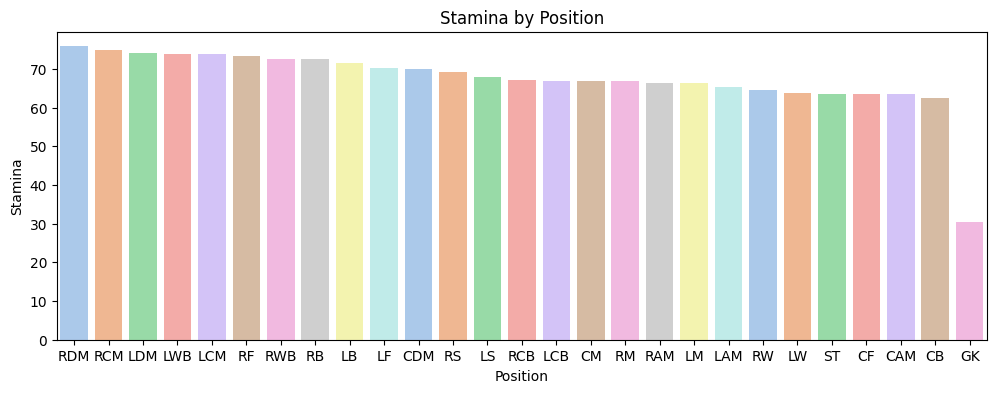

In [145]:
dfbar1 = dfimp.groupby('Position')["Crossing"].mean().sort_values(ascending=False)
plt.figure(figsize=(12,4))
sns.barplot(x= dfbar1.index, y=dfbar1, palette='pastel')
plt.xlabel('Position')
plt.ylabel('Overall AVG')
plt.title('Overall by Position')

dfbar2 = dfimp.groupby('Position')["FKAccuracy"].mean().sort_values(ascending=False)
plt.figure(figsize=(12,4))
sns.barplot(x= dfbar2.index, y=dfbar2, palette='pastel')
plt.xlabel('Position')
plt.ylabel('FK Accuracy AVG')
plt.title('FreeKick Accuracy by Position')

dfbar3 = dfimp.groupby('Position')["Finishing"].mean().sort_values(ascending=False)
plt.figure(figsize=(12,4))
sns.barplot(x= dfbar3.index, y=dfbar3, palette='pastel')
plt.xlabel('Position')
plt.ylabel('Finishing AVG')
plt.title('Finishing by Position')

dfbar4 = dfimp.groupby('Position')["SprintSpeed"].mean().sort_values(ascending=False)
plt.figure(figsize=(12,4))
sns.barplot(x= dfbar4.index, y=dfbar4, palette='pastel')
plt.xlabel('Position')
plt.ylabel('Sprint Speed')
plt.title('Sprint Speed by Position')

dfbar5 = dfimp.groupby('Position')["Stamina"].mean().sort_values(ascending=False)
plt.figure(figsize=(12,4))
sns.barplot(x= dfbar5.index, y=dfbar5, palette='pastel')
plt.xlabel('Position')
plt.ylabel('Stamina')
plt.title('Stamina by Position')

Klub dengan pemain terbanyak & Klub dengan rata-rata overall tertinggi

Jumlah team dengan member terbanyak
Club
Borussia Dortmund    33
Tottenham Hotspur    33
Chelsea              33
Valencia CF          33
Everton              33
Newcastle United     33
Real Madrid          33
Frosinone            33
Arsenal              33
Cardiff City         33
Name: Name, dtype: int64


Text(0.5, 1.0, 'Most Overall Team')

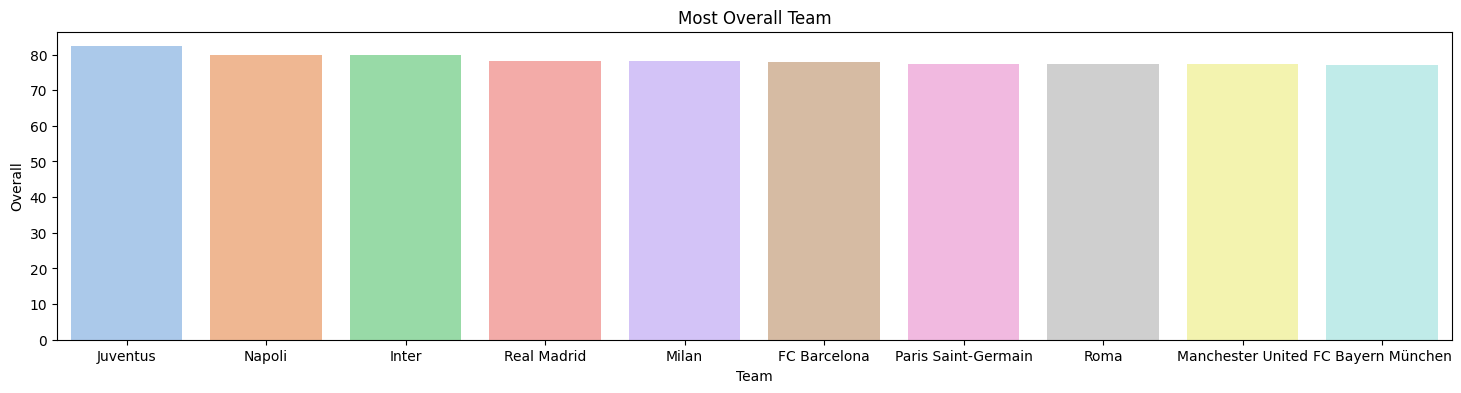

In [146]:
dfteam = df[["Name","Overall","Position","Club","Nationality"]]
print("Jumlah team dengan member terbanyak")
dfteam1 = dfteam.groupby('Club')
dfteam1_member_count = dfteam1["Name"].count().sort_values(ascending=False)
print(dfteam1_member_count.head(10))

dfteam_most_overall = dfteam1["Overall"].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(18,4))
sns.barplot(x= dfteam_most_overall.index, y=dfteam_most_overall, palette='pastel')
plt.xlabel('Team')
plt.ylabel('Overall')
plt.title('Most Overall Team')


Text(0.5, 1.0, 'Best Player')

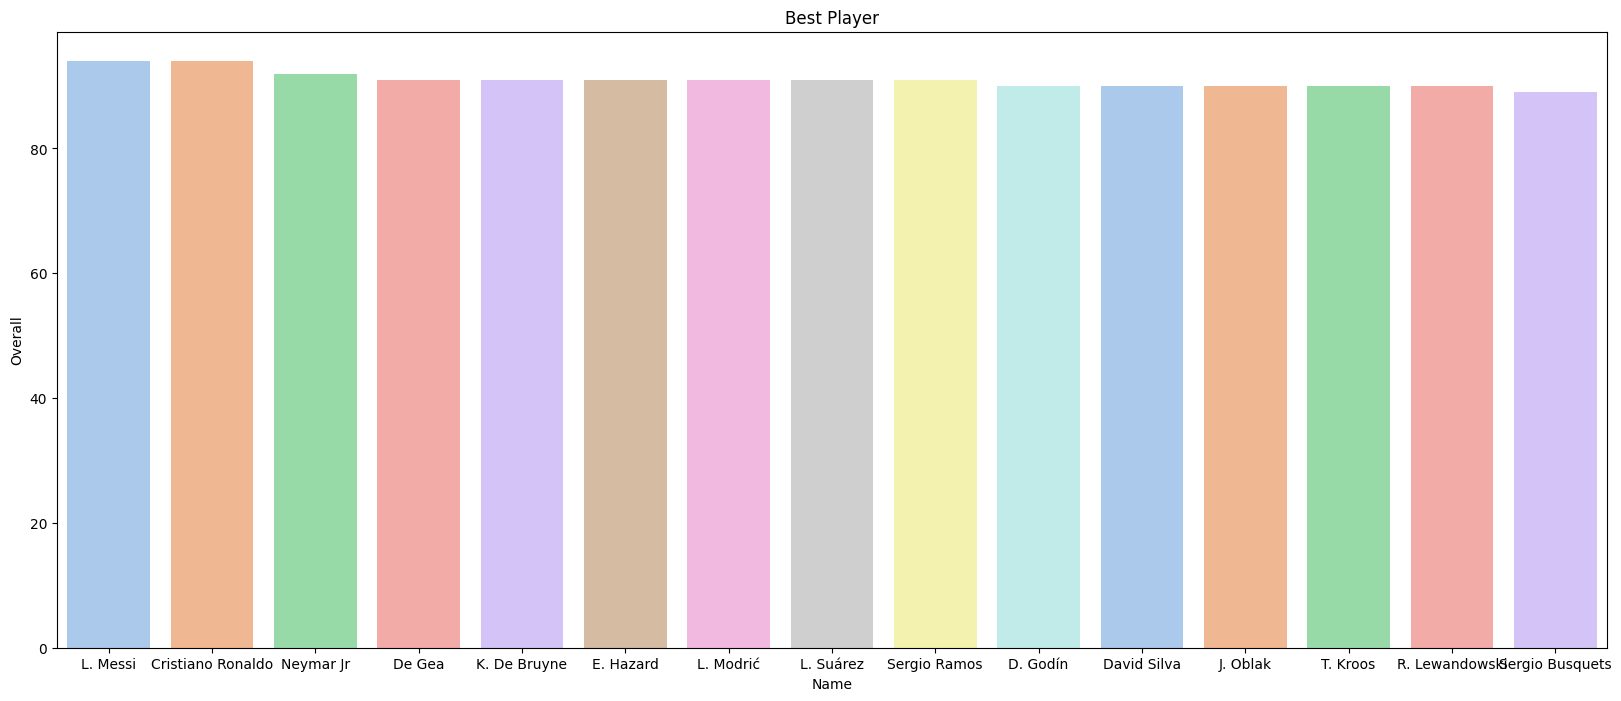

In [147]:
dfbestplayer = dfimp.sort_values(by="Overall", ascending=False).head(15)
dfbestplayer
plt.figure(figsize=(20,8))
sns.barplot(x="Name", y="Overall", data=dfbestplayer, palette='pastel')
plt.xlabel('Name')
plt.ylabel('Overall')
plt.title('Best Player')


Pemain terbaik berdasarkan overall diduduki oleh Messi dan Cristiano Ronaldo dengan overall 94

Text(0.5, 1.0, 'Overall player')

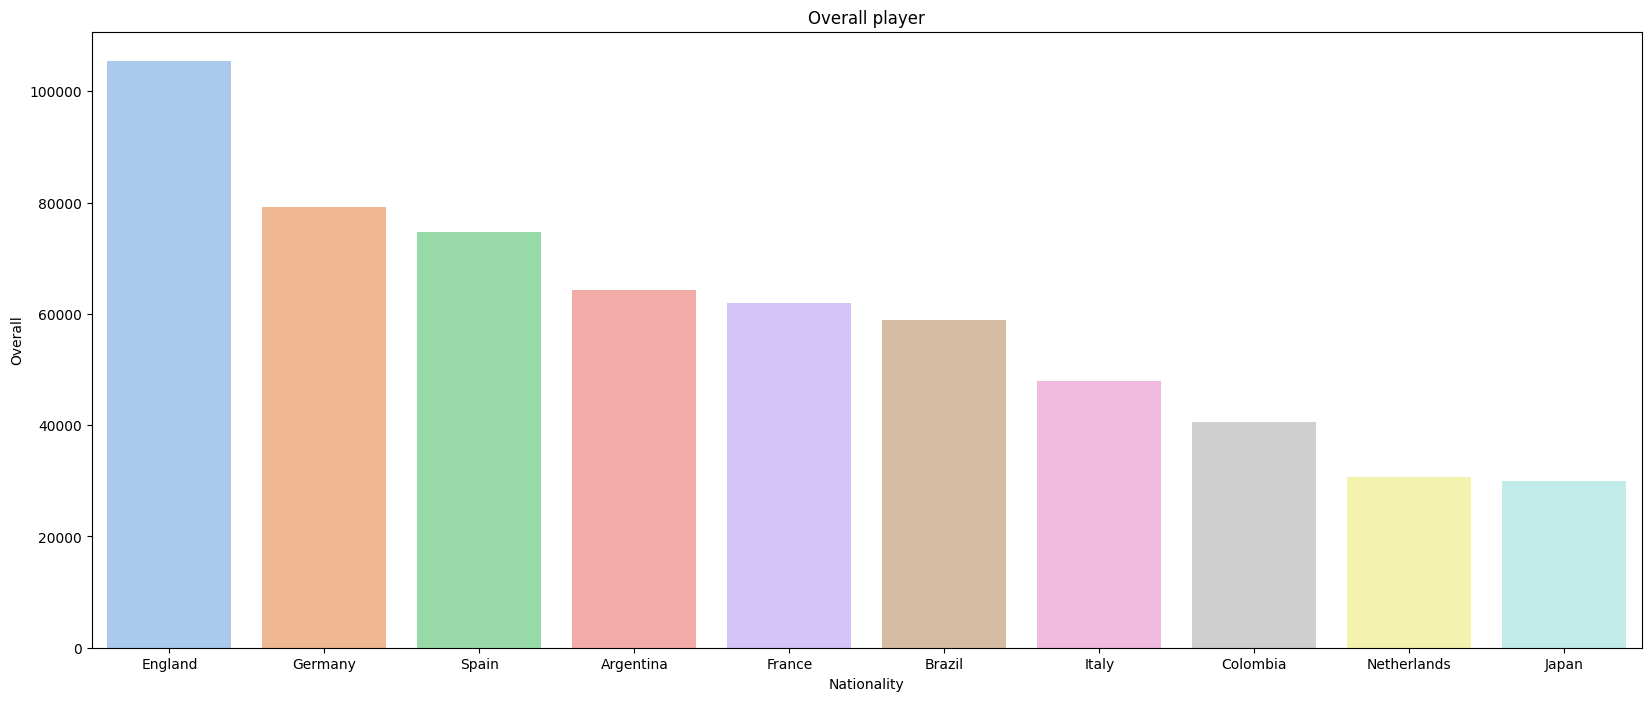

In [148]:
best_player = {}
for club in df['Nationality'].unique():
    overall_rating = df['Overall'][df['Nationality'] == club].sum()
    best_player[club] = overall_rating
df_bsp = pd.DataFrame.from_dict(best_player , orient = 'index' , 
                                                 columns = ['overall'])
df_bsp['Nationality'] = df_bsp.index
df_bsp = df_bsp.sort_values(by = 'overall' , ascending =  False)

df_bsp
plt.figure(figsize=(20,8))
sns.barplot(x="Nationality", y="overall", data=df_bsp.head(10), palette='pastel')
plt.xlabel('Nationality')
plt.ylabel('Overall')
plt.title('Overall player')


England menjadi negara dengan jumlah overall pemain nya yang tinggi diikuti oleh jerman dan spanyol

Young player

Text(0.5, 1.0, 'Best Young Player (under 21)')

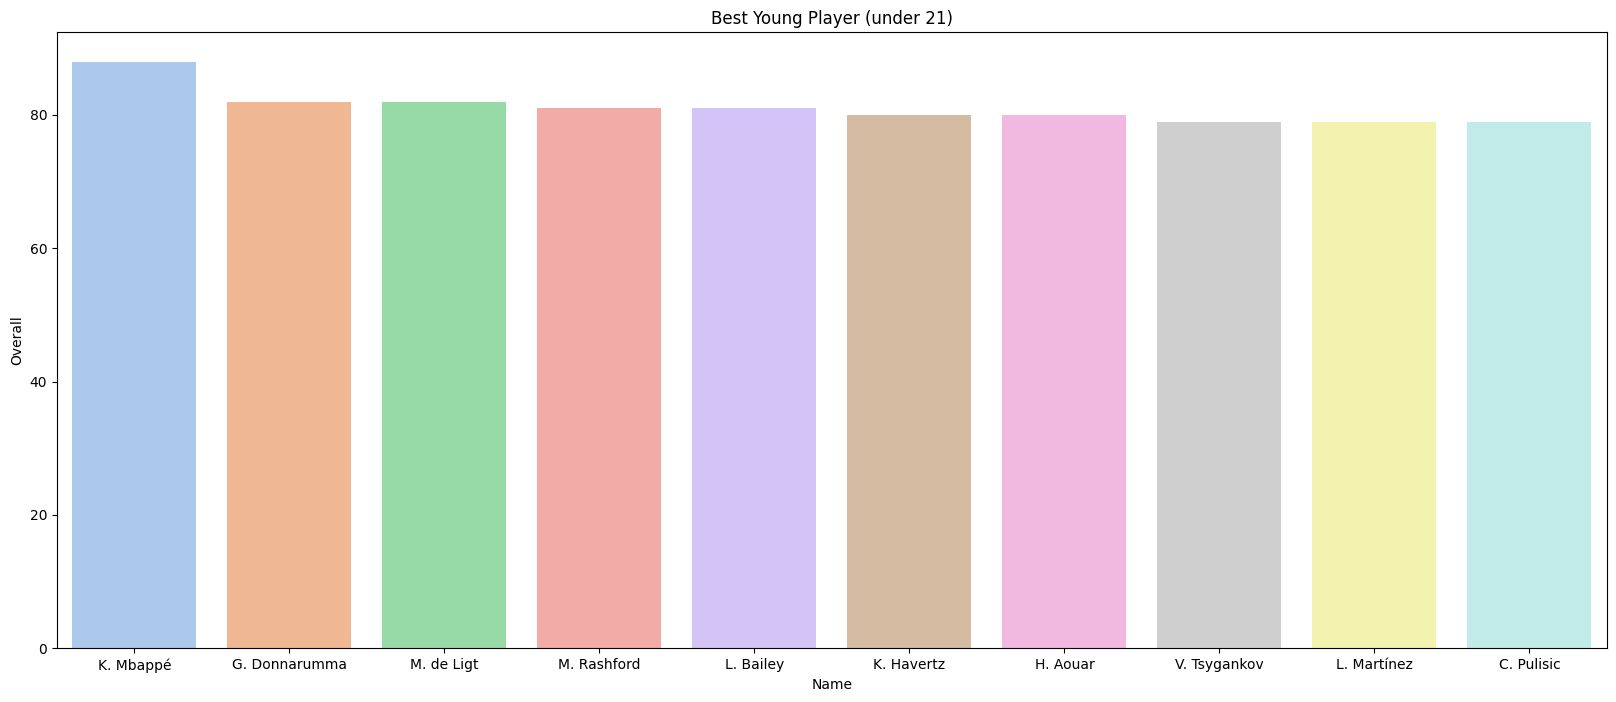

In [149]:
dfyoungplayer = dfimp[dfimp['Age'] < 21].sort_values(by="Overall", ascending=False)

plt.figure(figsize=(20,8))
sns.barplot(x="Name", y="Overall", data=dfyoungplayer.head(10), palette='pastel')
plt.xlabel('Name')
plt.ylabel('Overall')
plt.title('Best Young Player (under 21)')

Pemain muda terbaik adalah K mbappe diikuti oleh G donnaruma dan M de Ligt

Selanjutnya adalah untuk mengetahui 5 keterampilan teratas yang wajib dimiliki untuk setiap posisi

In [193]:
abilities = ['Crossing', 'Finishing', 'HeadingAccuracy',
       'ShortPassing', 'Volleys', 'Dribbling', 'Curve', 'FKAccuracy',
       'LongPassing', 'BallControl', 'Acceleration', 'SprintSpeed',
       'Agility', 'Reactions', 'Balance', 'ShotPower', 'Jumping',
       'Stamina', 'Strength', 'LongShots', 'Aggression', 'Interceptions',
       'Positioning', 'Vision', 'Penalties', 'Composure', 'Marking',
       'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling',
       'GKKicking', 'GKPositioning', 'GKReflexes']

df_positionss  = pd.DataFrame()
for position_name, features in df.groupby(df['Position'])[abilities].mean().iterrows():
    top_features = dict(features.nlargest(5))
    df_positionss[position_name] = tuple(top_features)
df_positionss.head()



,CAM,CB,CDM,CF,CM,GK,LAM,LB,LCB,LCM,...,RB,RCB,RCM,RDM,RF,RM,RS,RW,RWB,ST
0,Balance,Strength,Stamina,Agility,Balance,GKReflexes,Agility,SprintSpeed,Strength,Stamina,...,SprintSpeed,Strength,Stamina,Stamina,Agility,Acceleration,SprintSpeed,Acceleration,SprintSpeed,SprintSpeed
1,Agility,Jumping,Aggression,Balance,ShortPassing,GKDiving,Balance,Acceleration,Jumping,ShortPassing,...,Stamina,Jumping,ShortPassing,ShortPassing,Acceleration,SprintSpeed,Strength,SprintSpeed,Acceleration,Strength
2,Acceleration,StandingTackle,Strength,Acceleration,Agility,GKPositioning,SprintSpeed,Stamina,StandingTackle,Balance,...,Acceleration,Aggression,Agility,Aggression,Balance,Agility,Acceleration,Agility,Stamina,Acceleration
3,SprintSpeed,Aggression,ShortPassing,SprintSpeed,Stamina,GKHandling,Acceleration,Balance,Aggression,Agility,...,Balance,StandingTackle,Balance,Strength,BallControl,Balance,Agility,Balance,Agility,Jumping
4,BallControl,HeadingAccuracy,Jumping,Dribbling,Acceleration,GKKicking,Dribbling,Agility,HeadingAccuracy,BallControl,...,Jumping,HeadingAccuracy,BallControl,Jumping,SprintSpeed,Dribbling,ShotPower,Dribbling,Balance,Finishing


In [151]:
df_positionss["ST"]

0     SprintSpeed
1        Strength
2    Acceleration
3         Jumping
4       Finishing
Name: ST, dtype: object

Dream Team 

In [152]:
positions = ['CAM', 'CB', 'CDM', 'CF', 'CM', 'GK', 'LAM', 'LB', 'LCB', 'LCM', 'LDM', 'LF', 'LM', 'LS', 'LW', 'LWB', 'RAM', 'RB', 'RCB', 'RCM', 'RDM', 'RF', 'RM', 'RS', 'RW', 'RWB', 'ST']

dfs_by_position = []

for position in positions:
    df_position = dfimp[dfimp['Position'] == position].sort_values(by="Overall", ascending=False).head(1)
    dfs_by_position.append(df_position) # Menyimpan DataFrame dalam dictionary

dfteammate = pd.concat(dfs_by_position, axis=0)
print("Best Dream Team")
dfteammate[["Name","Position"]]

Bes Dream Team


,Name,Position
17,A. Griezmann,CAM
12,D. Godín,CB
20,Sergio Busquets,CDM
271,Luis Alberto,CF
67,Thiago,CM
3,De Gea,GK
28,J. Rodríguez,LAM
35,Marcelo,LB
24,G. Chiellini,LCB
11,T. Kroos,LCM


Diatas merupakan para pemain yang terbaik(overall tertinggi) yang menempati posisi tertentu 

In [153]:

df_cam = dfimp[dfimp['Position'] == 'ST']


rata_rata_attributes = df_cam[['SprintSpeed', 'Strength', 'Acceleration', "Jumping","Finishing"]].mean(axis=1)

pemain_terbaik = df_cam.loc[rata_rata_attributes.idxmax()]
pemain_terbaik["Name"]

'Cristiano Ronaldo'

In [217]:
print("Pilihan Pemain Dream Team dengan Atribut yang dibutuhkan untuk setiap posisi")
for position in df_positionss:
    df_posisi = dfimp[dfimp["Position"] == position]
    attributes = df_positionss.get(position, [])

    rata_rata_attributes = df_posisi[attributes].mean(axis=1)
    pemain_terbaik = df_posisi.loc[rata_rata_attributes.idxmax()]
    print(f"Pemain terbaik untuk posisi {position}: {pemain_terbaik['Name']}")
   


Pilihan Pemain Dream Team dengan Atribut yang dibutuhkan untuk setiap posisi
Pemain terbaik untuk posisi CAM: H. Nakagawa
Pemain terbaik untuk posisi CB: D. Godín
Pemain terbaik untuk posisi CDM: Casemiro
Pemain terbaik untuk posisi CF: S. Giovinco
Pemain terbaik untuk posisi CM: N. Keïta
Pemain terbaik untuk posisi GK: De Gea
Pemain terbaik untuk posisi LAM: Paulo Daineiro
Pemain terbaik untuk posisi LB: Jordi Alba
Pemain terbaik untuk posisi LCB: G. Chiellini
Pemain terbaik untuk posisi LCM: David Silva
Pemain terbaik untuk posisi LDM: N. Kanté
Pemain terbaik untuk posisi LF: E. Hazard
Pemain terbaik untuk posisi LM: Douglas Costa
Pemain terbaik untuk posisi LS: J. Martínez
Pemain terbaik untuk posisi LW: Neymar Jr
Pemain terbaik untuk posisi LWB: M. Pedersen
Pemain terbaik untuk posisi RAM: J. Cuadrado
Pemain terbaik untuk posisi RB: Nélson Semedo
Pemain terbaik untuk posisi RCB: Sergio Ramos
Pemain terbaik untuk posisi RCM: L. Modrić
Pemain terbaik untuk posisi RDM: P. Pogba
Pemain

Pemain diatas merupakan pemain terbaik untuk setiap posisinya, sesuai dengan keterampilan teratas yang wajib dimiliki oleh posisi tersebut.